In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import seaborn as sns
import ipywidgets as widgets
import plotly.express as px

In [3]:
# Read file excel by pandas
df=pd.read_excel("C:/Users/Admin/Downloads/Global_Superstore.xls")
# Drop'Row ID', 'Postal Code'
df.drop(columns=['Row ID', 'Postal Code'], inplace=True)
# Check NaN   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Region          51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Product ID      51290 non-null  object        
 13  Product Name    51290 non-null  object        
 14  Sub-Category    51290 non-null  object        
 15  Ca

In [4]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,Afghanistan,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.820,2,0.0,102.420,39.66,Medium
1,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,Afghanistan,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.540,9,0.0,104.490,18.72,Medium
2,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,Afghanistan,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.320,3,0.0,13.770,14.10,Medium
3,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,Afghanistan,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.680,4,0.0,79.680,11.01,Medium
4,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,Afghanistan,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.880,4,0.0,24.360,5.72,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,ZA-2014-AS285147-41718,2014-03-20,2014-03-25,Standard Class,AS-285147,Alejandro Savely,Corporate,Harare,Harare,Zimbabwe,...,OFF-AR-5911,"Sanford Highlighters, Easy-Erase",Art,Office Supplies,9.612,2,0.7,-21.168,1.02,Medium
51286,ZA-2017-HG4965147-42876,2017-05-21,2017-05-23,Second Class,HG-4965147,Henry Goldwyn,Corporate,Mutare,Manicaland,Zimbabwe,...,OFF-LA-3260,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies,4.104,1,0.7,-4.806,1.80,High
51287,ZA-2016-EB3870147-42499,2016-05-09,2016-05-15,Standard Class,EB-3870147,Emily Burns,Consumer,Mutare,Manicaland,Zimbabwe,...,OFF-AR-5922,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies,7.749,1,0.7,-9.051,1.46,Medium
51288,ZA-2015-JG5115147-42040,2015-02-05,2015-02-10,Standard Class,JG-5115147,Jack Garza,Consumer,Kadoma,Mashonaland West,Zimbabwe,...,TEC-MA-5542,"Panasonic Card Printer, Durable",Machines,Technology,104.364,2,0.7,-173.976,7.46,Medium


## Define the trend line of business


In [5]:
#Add Month column
df["Month"]=df["Order Date"].dt.month.astype(np.uint8)
#Add Year column
df["Year"]=df["Order Date"].dt.year.astype(int)

In [6]:
#Creating a DataFrame that show number of orders by 2014,2015,2016,2017
month_2014=pd.DataFrame(df[df["Year"]==2014].groupby("Month").count()["Sales"])
month_2015=pd.DataFrame(df[df["Year"]==2015].groupby("Month").count()["Sales"])
month_2016=pd.DataFrame(df[df["Year"]==2016].groupby("Month").count()["Sales"])
month_2017=pd.DataFrame(df[df["Year"]==2017].groupby("Month").count()["Sales"])

#concat  DataFrame and change name
month_4=pd.concat([month_2014,month_2015,month_2016,month_2017],axis=1)
month_4.columns=["201" + str(i) for i in range(4,8)]
month_4

,2014,2015,2016,2017
Month,,,,
1,433,551,709,918
2,431,417,605,756
3,511,662,766,1068
4,539,657,785,1051
5,606,840,1057,1284
6,888,1136,1530,1748
7,524,659,925,1087
8,865,1083,1442,1675
9,1035,1223,1682,2018


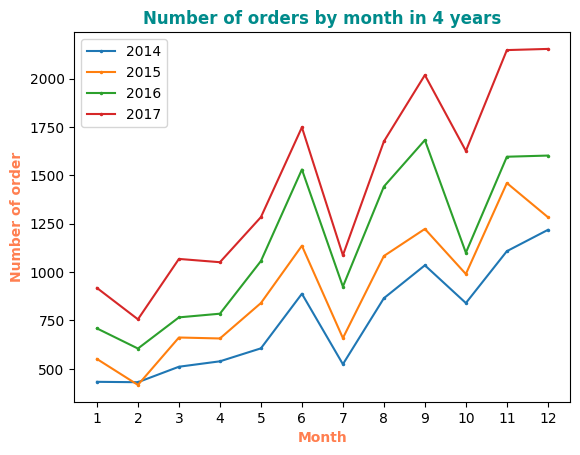

In [7]:
# Line chart
ax=month_4.plot.line(marker="o",markersize=1.5)
ax.set_xticks(range(1,13),[ str(i) for i in month_4.index.values],rotation=0)
ax.set_xlabel("Month",fontweight="bold",color="coral")
ax.set_title("Number of orders by month in 4 years",fontweight="bold",color="darkcyan")
ax.set_ylabel("Number of order",fontweight="bold",color="coral")
plt.show()

## Do shipping cost, shipping time and category cost affect number of orders?


### Shipping cost factor?


In [8]:
# Shippingcost mean per year 
shippingcost_yearly=df[["Shipping Cost","Year"]].groupby(["Year"]).mean().reset_index()
shippingcost_yearly

,Year,Shipping Cost
0,2014,27.251761
1,2015,25.961579
2,2016,26.520526
3,2017,26.371958


In [9]:
# Number of orders per year
order_yearly=df[["Year","Sales"]].groupby("Year").count().reset_index()
order_yearly

,Year,Sales
0,2014,8998
1,2015,10962
2,2016,13799
3,2017,17531


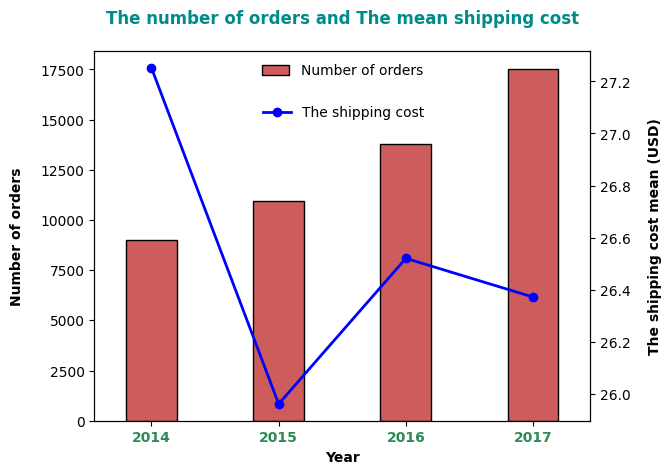

In [10]:
# Bar chart  
ax1=order_yearly.plot.bar(y="Sales",width=0.4,legend=None,color="indianred",edgecolor="black",linewidth=1)
ax1.set_xticklabels(order_yearly["Year"],fontweight="bold",color="seagreen",rotation=0)
ax1.set_xlabel("Year",fontweight="bold",fontsize=10)
ax1.set_ylabel("Number of orders",fontweight="bold",fontsize=10,labelpad=12)
ax1.legend(labels=["Number of orders"],frameon=False,loc="upper center")
ax1.set_title("The number of orders and The mean shipping cost",fontweight="bold",pad=20, color='darkcyan')

# twinx() 
ax2=ax1.twinx()
shippingcost_yearly.plot.line(ax=ax2, y="Shipping Cost", color='blue', linewidth=2,marker="o")
ax2.set_ylabel('The shipping cost mean (USD)', labelpad=12, fontsize=10, fontweight='bold')
ax2.legend(labels=['The shipping cost'],loc=(0.33,0.8),frameon=False)
plt.show()
plt.close("all")


### Delivery time factor?

In [11]:
# Add Delivery_Date = ship date - order date
df["Delivery_date"]=df["Ship Date"]-df["Order Date"]
# Convert to type: int 
df["Delivery_date"]=df["Delivery_date"].dt.days.astype(np.uint8)
df["Delivery_date"]

0        7
1        3
2        7
3        7
4        3
        ..
51285    5
51286    2
51287    6
51288    5
51289    5
Name: Delivery_date, Length: 51290, dtype: uint8

In [12]:
#groupby year & calculate mean() per year
shippingtime_yearly=df.groupby("Year").mean()["Delivery_date"].reset_index()
shippingtime_yearly

,Year,Delivery_date
0,2014,3.948544
1,2015,3.998449
2,2016,3.987608
3,2017,3.950545


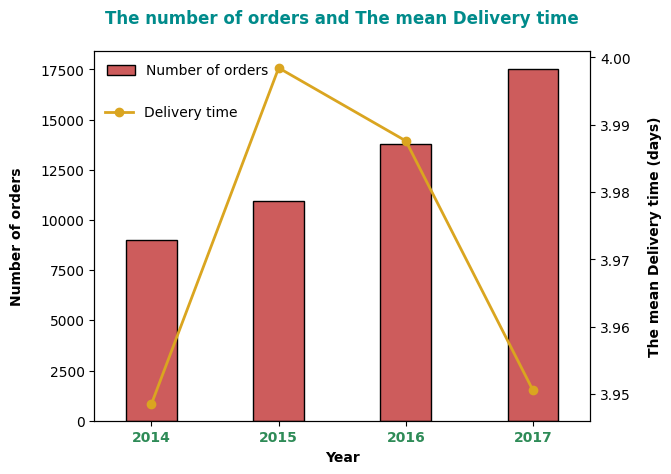

In [13]:
#Bar chart
ax1=order_yearly.plot.bar(y="Sales",width=0.4,legend=None,color="indianred",edgecolor="black",linewidth=1)
ax1.set_xticklabels(order_yearly["Year"],fontweight="bold",color="seagreen",rotation=0)
ax1.set_xlabel("Year",fontweight="bold",fontsize=10)
ax1.set_ylabel("Number of orders",fontweight="bold",fontsize=10,labelpad=12)
ax1.legend(labels=["Number of orders"],frameon=False,loc="upper left")
ax1.set_title("The number of orders and The mean Delivery time",fontweight="bold",pad=20, color='darkcyan')

#twinx
ax3=ax1.twinx()
shippingtime_yearly.plot.line(ax=ax3, y=["Delivery_date"], color='goldenrod', linewidth=2,marker="o")
ax3.set_ylabel('The mean Delivery time (days)', labelpad=12, fontsize=10, fontweight='bold')
ax3.legend(labels=['Delivery time'],loc=(0.01,0.8),frameon=False)
plt.show()

### Category cost by year

In [14]:
#Create Cost column
df["Cost"]=(df["Sales"]-df["Profit"])/df["Quantity"]

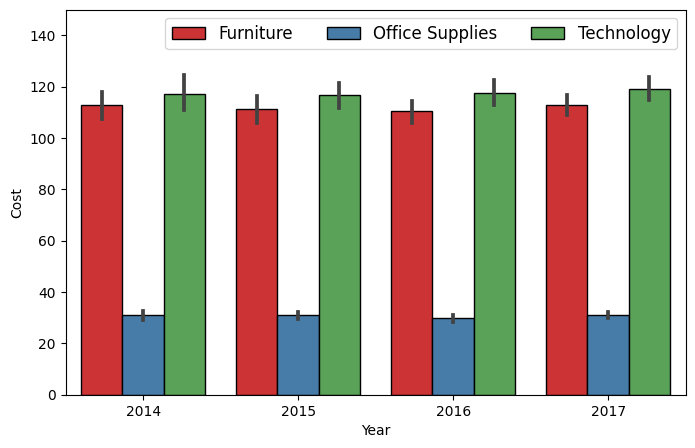

In [15]:
fig2=plt.figure(figsize=(8,5))
ax7=sns.barplot(x=df["Year"], y = df["Cost"],hue=df["Category"],palette="Set1",edgecolor="k")
ax7.legend(ncol=3,fontsize=12)
ax7.set_ylim([0,150])
plt.show()

## Correlative between Profit & Sales 

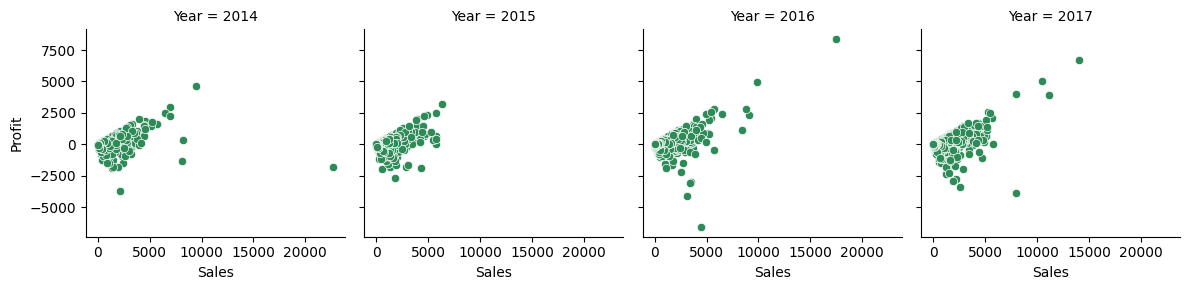

In [35]:
bieudo2 = sns.FacetGrid(df, col='Year', 
                        height=3, aspect=1)
bieudo2.map(sns.scatterplot, 'Sales', 'Profit', color='seagreen')
plt.tight_layout()

## What is the most common category?

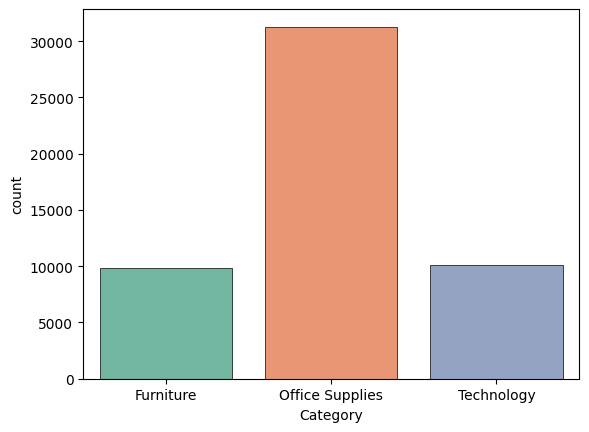

In [36]:
sns.countplot(x=df["Category"],edgecolor="k",linewidth=0.5,palette="Set2")
plt.show()

### Which segment ordered the most?

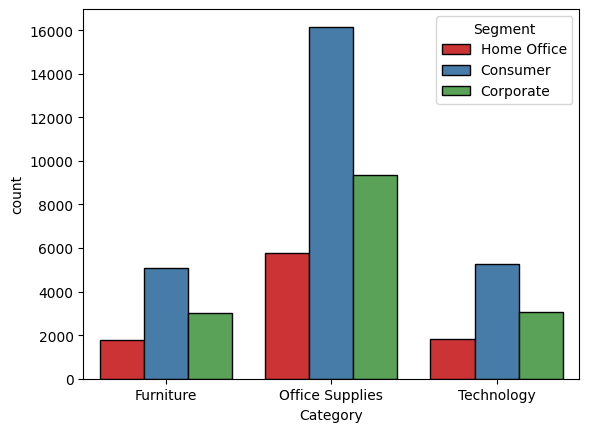

In [20]:
ax2=sns.countplot(x=df["Category"], hue=df["Segment"],palette="Set1",edgecolor="k")
# for in container 
for container in ax.containers:
    ax.bar_label(container, label_type='center',color="seashell",fontweight="bold",fontsize=8)
plt.show()

### Comparing Total order, Total sales, Total profit  by category

<Axes: xlabel='Category'>

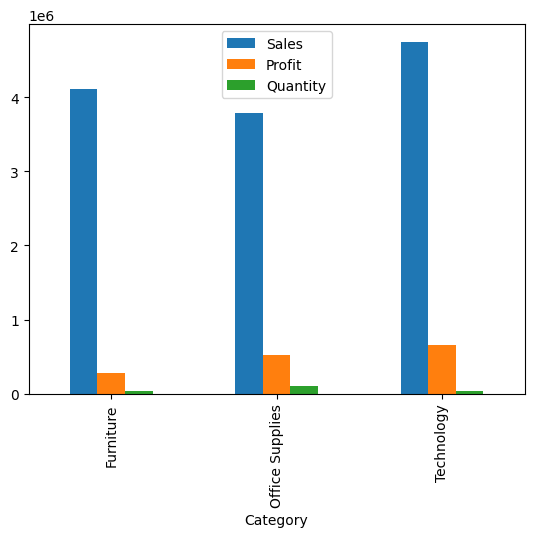

In [21]:
Sales_profit_Quantity=df[["Category","Sales","Profit","Quantity"]].groupby("Category").sum().reset_index()
Sales_profit_Quantity.plot.bar(x="Category",y=["Sales","Profit","Quantity"])

### Correlation between Discount, Quantity & Sales by Category

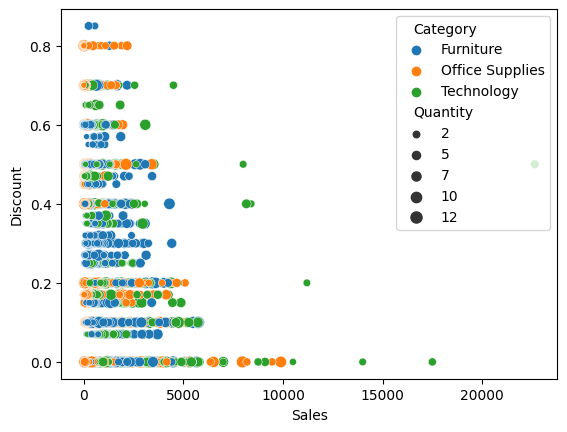

In [33]:
sns.scatterplot(data=df, 
                y='Discount', x='Sales',hue="Category",size="Quantity")
plt.show()

## Sales, Profit by Country : Tree Map

In [23]:
list_name = ['Sales', 'Profit']
list_1 = ['#FF6600','#FF7300','#FF8000','#FF8C00','#FF9900','#FFA600','#FFB300','#FFBF00','#FFDA1F','#FFCC00']
df_Country = df.groupby(["Country"]).sum().reset_index()
@widgets.interact(values=list_name)
def sales_profit_country(values='Sales'):
    fig = px.treemap(df_Country, path=['Country'], values=values, color='Country',color_discrete_sequence = list_1,
                     maxdepth=2
                    )
    fig.update_traces(textinfo = "label+value",
                      textposition='middle center',
                      textfont_size=14,
                      hovertemplate ="%{label} <br>%{value}"
                     )
#     fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig.update_layout(title=f"{values} by Country",
                      title_font_color='orange',
                      title_font_size=20,
                      title_font_family="Times New Roman",
                     )
    fig.show()

interactive(children=(Dropdown(description='values', options=('Sales', 'Profit'), value='Sales'), Output()), _…